In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


# Finansal oranlar veri setini oku
data = pd.read_excel("data2.xlsx")



In [2]:
data["Tarih"] = pd.to_datetime(data["Tarih"], format="%Y-%m-%d")


In [3]:

data["Year"] = data["Tarih"].dt.year
data["Month"] = data["Tarih"].dt.month
data["Day"] = data["Tarih"].dt.day
data

,hisse adı,Cari Oran,Asit-Test Oranı,Nakit Oran,Özsermaye Devir Hızı,Özsermaye Karlılığı,Net Kar Marjı,Tarih,Adj Close,Close,...,Low,Open,Volume,USD A,USD S,EUR A,EUR S,Year,Month,Day
0,ARCLK,1.787006,1.390596,0.398847,0.415533,0.119948,0.288660,2010-01-01,4.013266,5.90,...,5.90,5.90,0,1.5432,1.550667,2.05110,2.0610,2010,1,1
1,ARCLK,1.787006,1.390596,0.398847,0.415533,0.119948,0.288660,2010-01-04,4.013266,5.90,...,5.80,5.85,1624345,1.5432,1.550667,2.05110,2.0610,2010,1,4
2,ARCLK,1.787006,1.390596,0.398847,0.415533,0.119948,0.288660,2010-01-05,4.115299,6.05,...,5.95,6.00,7637877,1.5432,1.550667,2.05110,2.0610,2010,1,5
3,ARCLK,1.787006,1.390596,0.398847,0.415533,0.119948,0.288660,2010-01-06,4.251342,6.25,...,6.10,6.20,2416762,1.5432,1.550667,2.05110,2.0610,2010,1,6
4,ARCLK,1.787006,1.390596,0.398847,0.415533,0.119948,0.288660,2010-01-07,4.217331,6.20,...,6.10,6.25,1762612,1.5432,1.550667,2.05110,2.0610,2010,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29147,TTKOM,258.770076,254.806677,101.860799,0.352946,-0.166307,-0.471196,2020-03-13,6.095974,6.39,...,5.97,6.20,16673538,5.9401,5.950800,6.65635,6.6683,2020,3,13
29148,TTKOM,258.770076,254.806677,101.860799,0.352946,-0.166307,-0.471196,2020-03-16,5.533123,5.80,...,5.67,6.02,10396197,5.9401,5.950800,6.65635,6.6683,2020,3,16
29149,TTKOM,258.770076,254.806677,101.860799,0.352946,-0.166307,-0.471196,2020-03-17,5.599902,5.87,...,5.35,6.00,14016543,5.9401,5.950800,6.65635,6.6683,2020,3,17
29150,TTKOM,258.770076,254.806677,101.860799,0.352946,-0.166307,-0.471196,2020-03-18,5.475883,5.74,...,5.69,5.75,13103441,5.9401,5.950800,6.65635,6.6683,2020,3,18


In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Boş listeler oluşturun
eğitim_r2_skorları = []
test_r2_skorları = []
eğitim_hataları = []
test_hataları = []

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # XGBoost Regressor modelini oluşturun
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=4,
        min_child_weight=1,
        learning_rate=0.1
    )

    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)

    # Performans metriklerini kaydedin
    eğitim_r2_skorları.append(cv_r2_score)
    test_r2_skorları.append(r2_score(y_test, y_test_pred))
    eğitim_hataları.append(train_error)
    test_hataları.append(test_error)

    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')

# En iyi performans değerlerini bulun
en_iyi_eğitim_r2_skoru = max(eğitim_r2_skorları)
en_iyi_test_r2_skoru = max(test_r2_skorları)
en_iyi_eğitim_hatasi = min(eğitim_hataları)
en_iyi_test_hatasi = min(test_hataları)

# Performans değerlerini yazdırın
print(f'En iyi Eğitim Verisi R2 Skoru: {en_iyi_eğitim_r2_skoru}')
print(f'En iyi Test Verisi R2 Skoru: {en_iyi_test_r2_skoru}')
print(f'En iyi Eğitim Hatası: {en_iyi_eğitim_hatasi}')
print(f'En iyi Test Hatası: {en_iyi_test_hatasi}')

# Ortalama performans değerlerini hesaplayın
ortalama_eğitim_r2_skoru = sum(eğitim_r2_skorları) / len(eğitim_r2_skorları)
ortalama_test_r2_skoru = sum(test_r2_skorları) / len(test_r2_skorları)
ortalama_eğitim_hatasi = sum(eğitim_hataları) / len(eğitim_hataları)
ortalama_test_hatasi = sum(test_hataları) / len(test_hataları)

# Ortalama performans değerlerini yazdırın
print(f'Ortalama Eğitim Verisi R2 Skoru: {ortalama_eğitim_r2_skoru}')
print(f'Ortalama Test Verisi R2 Skoru: {ortalama_test_r2_skoru}')
print(f'Ortalama Eğitim Hatası: {ortalama_eğitim_hatasi}')
print(f'Ortalama Test Hatası: {ortalama_test_hatasi}')


ARCLK Hisse Modeli - Cross-Validation R2: 0.9991127346857503, Eğitim Hatası: 0.011808724516856325, Test Hatası: 0.023209194513547124
ASELS Hisse Modeli - Cross-Validation R2: 0.9989763046580167, Eğitim Hatası: 0.009031466827872139, Test Hatası: 0.05991790457202113
BIMAS Hisse Modeli - Cross-Validation R2: 0.9992645500975936, Eğitim Hatası: 0.04481844106245107, Test Hatası: 0.11759730128539266
EREGL Hisse Modeli - Cross-Validation R2: 0.9989056564856709, Eğitim Hatası: 0.002146202534213542, Test Hatası: 0.00648306735587614
KRDMD Hisse Modeli - Cross-Validation R2: 0.9989441527092658, Eğitim Hatası: 0.00022245189814570245, Test Hatası: 0.001073543380535559
KOZAL Hisse Modeli - Cross-Validation R2: 0.9987933999275043, Eğitim Hatası: 0.0915841682394306, Test Hatası: 0.2545900758797564
KOZAA Hisse Modeli - Cross-Validation R2: 0.9987557218495485, Eğitim Hatası: 0.0016584177066245596, Test Hatası: 0.008664082917195875
THYAO Hisse Modeli - Cross-Validation R2: 0.9992184008037552, Eğitim Hatas

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

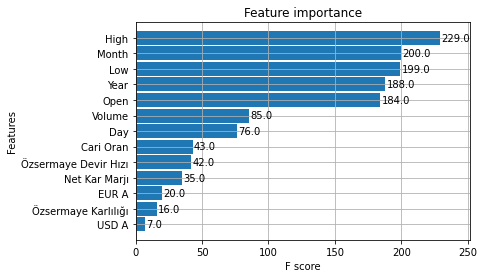

In [5]:
xgb.plot_importance(model, height=0.9)

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # XGBoost Regressor modelini oluşturun
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=4,
        min_child_weight=1,
        learning_rate=0.1
    )

    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)

    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')


ARCLK Hisse Modeli - Cross-Validation R2: 0.9987588093604325, Eğitim Hatası: 0.01855454957821629, Test Hatası: 0.03376728549113998
ASELS Hisse Modeli - Cross-Validation R2: 0.9989611961803847, Eğitim Hatası: 0.010429456078133635, Test Hatası: 0.06276059137899428
BIMAS Hisse Modeli - Cross-Validation R2: 0.9988337698688777, Eğitim Hatası: 0.08605383537989683, Test Hatası: 0.18306329112076655
EREGL Hisse Modeli - Cross-Validation R2: 0.9963775815194934, Eğitim Hatası: 0.008346023561092705, Test Hatası: 0.02375762900415452
KRDMD Hisse Modeli - Cross-Validation R2: 0.9989663534257686, Eğitim Hatası: 0.00022312066268291225, Test Hatası: 0.0010126609754839114
KOZAL Hisse Modeli - Cross-Validation R2: 0.9987963602989198, Eğitim Hatası: 0.09346083392916157, Test Hatası: 0.24720932870303544
KOZAA Hisse Modeli - Cross-Validation R2: 0.9987619693311155, Eğitim Hatası: 0.0016745780224380297, Test Hatası: 0.008477513071006406
THYAO Hisse Modeli - Cross-Validation R2: 0.999230651722909, Eğitim Hatas

In [20]:

    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Cross-Validation R2 (%): {cv_r2_score:.2f}')
    print(f'{hisse} Hisse Modeli - Eğitim Hatası: {train_error:.2f}')
    print(f'{hisse} Hisse Modeli - Test Hatası: {test_error:.2f}')

TTKOM Hisse Modeli - Cross-Validation R2 (%): 1.00
TTKOM Hisse Modeli - Eğitim Hatası: 0.00
TTKOM Hisse Modeli - Test Hatası: 0.00


In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
        # Yapay Sinir Ağı (YSA) modelini oluşturun
    model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=200,
        random_state=42
    )
  

    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)

    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')





ARCLK Hisse Modeli - Cross-Validation R2: -672.26128165856, Eğitim Hatası: 382800.3421870616, Test Hatası: 434702.88826283446
ASELS Hisse Modeli - Cross-Validation R2: -48259.656525860264, Eğitim Hatası: 62188.473992413616, Test Hatası: 57222.89759200755
BIMAS Hisse Modeli - Cross-Validation R2: -393662.0503659646, Eğitim Hatası: 2947698.057296427, Test Hatası: 2341424.078577421
EREGL Hisse Modeli - Cross-Validation R2: -46576.20615404786, Eğitim Hatası: 58318994.46523317, Test Hatası: 54293662.32743575
KRDMD Hisse Modeli - Cross-Validation R2: -55800.17441776086, Eğitim Hatası: 417116.2921350464, Test Hatası: 412415.4993755945
KOZAL Hisse Modeli - Cross-Validation R2: -169.01235401885475, Eğitim Hatası: 27040.06273717928, Test Hatası: 25909.348002527753
KOZAA Hisse Modeli - Cross-Validation R2: -37387.09722069971, Eğitim Hatası: 766399.259590619, Test Hatası: 722608.1421699104
THYAO Hisse Modeli - Cross-Validation R2: -2170.333720071986, Eğitim Hatası: 25659.798766106553, Test Hatası:

In [12]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Veri setini yükleyin ve özellikleri, hedef değişkeni belirleyin
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # XGBoost Regressor modelini oluşturun
    model = lgb.LGBMRegressor(
        boosting_type='gbdt',
        num_leaves=31,
        learning_rate=0.1,
        n_estimators=100
    )


    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)

    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')





ARCLK Hisse Modeli - Cross-Validation R2: 0.9991324079912776, Eğitim Hatası: 0.0072089473293855426, Test Hatası: 0.02220031508908691
ASELS Hisse Modeli - Cross-Validation R2: 0.9984260468006598, Eğitim Hatası: 0.05783315534605758, Test Hatası: 0.1708463080169052
BIMAS Hisse Modeli - Cross-Validation R2: 0.9993201515473809, Eğitim Hatası: 0.02986843913472467, Test Hatası: 0.11022140011597674
EREGL Hisse Modeli - Cross-Validation R2: 0.9988097497036804, Eğitim Hatası: 0.0014009416029153766, Test Hatası: 0.005338656484743677
KRDMD Hisse Modeli - Cross-Validation R2: 0.9989604797015886, Eğitim Hatası: 0.00032737656868637847, Test Hatası: 0.0011127446718690265
KOZAL Hisse Modeli - Cross-Validation R2: 0.9987345519766446, Eğitim Hatası: 0.08137447665687955, Test Hatası: 0.24087681951626164
KOZAA Hisse Modeli - Cross-Validation R2: 0.9980166072582073, Eğitim Hatası: 0.003366249130958664, Test Hatası: 0.008752476118213249
THYAO Hisse Modeli - Cross-Validation R2: 0.9991779378700418, Eğitim Hat

In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # XGBoost Regressor modelini oluşturun
    model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)

    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)
    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')
    # En iyi performans değerlerini bulun
en_iyi_eğitim_r2_skoru = max(eğitim_r2_skorları)
en_iyi_test_r2_skoru = max(test_r2_skorları)
en_iyi_eğitim_hatasi = min(eğitim_hataları)
en_iyi_test_hatasi = min(test_hataları)

# Performans değerlerini yazdırın
print(f'En iyi Eğitim Verisi R2 Skoru: {en_iyi_eğitim_r2_skoru}')
print(f'En iyi Test Verisi R2 Skoru: {en_iyi_test_r2_skoru}')
print(f'En iyi Eğitim Hatası: {en_iyi_eğitim_hatasi}')
print(f'En iyi Test Hatası: {en_iyi_test_hatasi}')

# Ortalama performans değerlerini hesaplayın
ortalama_eğitim_r2_skoru = sum(eğitim_r2_skorları) / len(eğitim_r2_skorları)
ortalama_test_r2_skoru = sum(test_r2_skorları) / len(test_r2_skorları)
ortalama_eğitim_hatasi = sum(eğitim_hataları) / len(eğitim_hataları)
ortalama_test_hatasi = sum(test_hataları) / len(test_hataları)

# Ortalama performans değerlerini yazdırın
print(f'Ortalama Eğitim Verisi R2 Skoru: {ortalama_eğitim_r2_skoru}')
print(f'Ortalama Test Verisi R2 Skoru: {ortalama_test_r2_skoru}')
print(f'Ortalama Eğitim Hatası: {ortalama_eğitim_hatasi}')
print(f'Ortalama Test Hatası: {ortalama_test_hatasi}')


ARCLK Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9987620224234511, Eğitim Hatası: 0.03617974660727603, Test Hatası: 0.03630504541557064
ASELS Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9997066671234112, Eğitim Hatası: 0.022994397199533848, Test Hatası: 0.022105423400663834
BIMAS Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9987722599965675, Eğitim Hatası: 0.16626901703216238, Test Hatası: 0.1854068002619027
EREGL Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9957759973262974, Eğitim Hatası: 0.023123188408728523, Test Hatası: 0.026267246808522476
KRDMD Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.999498554323047, Eğitim Hatası: 0.00046836125821024505, Test Hatası: 0.0006363918489684278
KOZAL Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9992243982623693, Eğitim Hatası: 0.1854875953613056, Test Hatası: 0.17214851212443766
KOZAA Hisse Modeli (Lineer Regresyon) - Cross-Validation R2: 0.9991647015438039, Eğitim Hatası

In [14]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model = DecisionTreeRegressor(criterion="mse", max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=1)

    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)
    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')
    

ARCLK Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9887166014957595, Eğitim Hatası: 0.2688575177254144, Test Hatası: 0.2995363992362901
ASELS Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9956229340844592, Eğitim Hatası: 0.2877965263232625, Test Hatası: 0.3924520496624763
BIMAS Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9933370745051292, Eğitim Hatası: 0.8204536306015884, Test Hatası: 0.9642289043112394
EREGL Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9894331844031156, Eğitim Hatası: 0.045347678439982046, Test Hatası: 0.06082394060966057
KRDMD Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9930230319933626, Eğitim Hatası: 0.005810503728631074, Test Hatası: 0.0069289563509568695
KOZAL Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9930411468974428, Eğitim Hatası: 1.4352995334801335, Test Hatası: 1.5934808798054427
KOZAA Hisse Modeli (Karar Ağaçları) - Cross-Validation R2: 0.9921071079836296, Eğitim Hatası: 0.031113199615833562, 

In [15]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state=1)


    # Cross-validation ile modeli değerlendirin
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score = cv_scores.mean()

    # Modeli eğitin
    model.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred = model.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error = mean_squared_error(y_train, y_train_pred)

    # Test verileri üzerinde tahmin yapın
    y_test_pred = model.predict(X_test)

    # Test hatasını hesaplayın
    test_error = mean_squared_error(y_test, y_test_pred)
    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli (Random Forest) - Cross-Validation R2: {cv_r2_score}, Eğitim Hatası: {train_error}, Test Hatası: {test_error}')
    

ARCLK Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9990235413546911, Eğitim Hatası: 0.003540198296614797, Test Hatası: 0.024310423081804602
ASELS Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9993354047214632, Eğitim Hatası: 0.007606514913375517, Test Hatası: 0.06832371057331629
BIMAS Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9992460209902555, Eğitim Hatası: 0.013437872260994963, Test Hatası: 0.1429258687503416
EREGL Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9990636537138619, Eğitim Hatası: 0.0007419619830360928, Test Hatası: 0.006484563103706415
KRDMD Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9990306942547965, Eğitim Hatası: 0.00011763968679461181, Test Hatası: 0.0009860765477622034
KOZAL Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9989055241585483, Eğitim Hatası: 0.035664021258207584, Test Hatası: 0.21704192620971482
KOZAA Hisse Modeli (Random Forest) - Cross-Validation R2: 0.9987416419726672, Eğitim Hatası: 0.00086106310

In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

test_errors = []

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "Month", "Day", "High", "Low","USD A","EUR A", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Linear Regression modelini oluşturun
    model_lr = LinearRegression()

    # Cross-validation ile Linear Regression modelini değerlendirin
    cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score_lr = cv_scores_lr.mean()

    # Modeli eğitin
    model_lr.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred_lr = model_lr.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error_lr = mean_squared_error(y_train, y_train_pred_lr)

    # Test verileri üzerinde tahmin yapın
    y_test_pred_lr = model_lr.predict(X_test)

    # Test hatasını hesaplayın
    test_error_lr = mean_squared_error(y_test, y_test_pred_lr)

    # Karar Ağaçları modelini oluşturun
    model_dt = DecisionTreeRegressor()

    # Cross-validation ile Karar Ağaçları modelini değerlendirin
    cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score_dt = cv_scores_dt.mean()

    # Modeli eğitin
    model_dt.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred_dt = model_dt.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error_dt = mean_squared_error(y_train, y_train_pred_dt)

    # Test verileri üzerinde tahmin yapın
    y_test_pred_dt = model_dt.predict(X_test)

    # Test hatasını hesaplayın
    test_error_dt = mean_squared_error(y_test, y_test_pred_dt)

    # Random Forest modelini oluşturun
    model_rf = RandomForestRegressor(n_estimators=100)

    # Cross-validation ile Random Forest modelini değerlendirin
    cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')

    # R2 skorlarının ortalamasını alın
    cv_r2_score_rf = cv_scores_rf.mean()

    # Modeli eğitin
    model_rf.fit(X_train, y_train)

    # Eğitim verileri üzerinde tahmin yapın
    y_train_pred_rf = model_rf.predict(X_train)

    # Eğitim hatasını hesaplayın
    train_error_rf = mean_squared_error(y_train, y_train_pred_rf)

    # Test verileri üzerinde tahmin yapın
    y_test_pred_rf = model_rf.predict(X_test)

    # Test hatasını hesaplayın
    test_error_rf = mean_squared_error(y_test, y_test_pred_rf)

    # Test hatasını kaydedin
    test_errors.append(test_error_rf)
    # Model performansını yazdırın
    print(f'{hisse} Hisse Modeli - Linear Regression - Cross-Validation R2: {cv_r2_score_lr:}, Eğitim Hatası: {train_error_lr:}, Test Hatası: {test_error_lr:}')
    print(f'{hisse} Hisse Modeli - Decision Trees - Cross-Validation R2: {cv_r2_score_dt:}, Eğitim Hatası: {train_error_dt:}, Test Hatası: {test_error_dt:}')
    print(f'{hisse} Hisse Modeli - Random Forest - Cross-Validation R2: {cv_r2_score_rf:}, Eğitim Hatası: {train_error_rf:}, Test Hatası: {test_error_rf:}')

# Genel performansı hesapla
genel_performans = 100 * (1 - np.mean(test_errors) / np.var(y_test))

# Genel performansı yazdır
print(f'Genel Performans: {genel_performans:.2f}')


ARCLK Hisse Modeli - Linear Regression - Cross-Validation R2: 0.9987620224234487, Eğitim Hatası: 0.03617974660727522, Test Hatası: 0.03630504541565434
ARCLK Hisse Modeli - Decision Trees - Cross-Validation R2: 0.9981979352666069, Eğitim Hatası: 2.5419792864264614e-32, Test Hatası: 0.04618025073926082
ARCLK Hisse Modeli - Random Forest - Cross-Validation R2: 0.9990114287374071, Eğitim Hatası: 0.003582306660400361, Test Hatası: 0.024706832911414244
ASELS Hisse Modeli - Linear Regression - Cross-Validation R2: 0.9997065140018726, Eğitim Hatası: 0.022994317891418606, Test Hatası: 0.02210746222083613
ASELS Hisse Modeli - Decision Trees - Cross-Validation R2: 0.9989604004115817, Eğitim Hatası: 2.5658103422367094e-32, Test Hatası: 0.08677341147372608
ASELS Hisse Modeli - Random Forest - Cross-Validation R2: 0.9993269520814435, Eğitim Hatası: 0.007120072007140651, Test Hatası: 0.06536013470668454
BIMAS Hisse Modeli - Linear Regression - Cross-Validation R2: 0.9987722599965714, Eğitim Hatası: 0

    Hisse              Model  Genel Performans
0   ARCLK  Linear Regression         99.854837
1   ARCLK     Decision Trees         99.786579
2   ARCLK      Random Forest         99.884487
3   ASELS  Linear Regression         99.973987
4   ASELS     Decision Trees         99.900637
5   ASELS      Random Forest         99.923927
6   BIMAS  Linear Regression         99.783008
7   BIMAS     Decision Trees         99.735263
8   BIMAS      Random Forest         99.838111
9   EREGL  Linear Regression         99.068910
10  EREGL     Decision Trees         99.291037
11  EREGL      Random Forest         99.522784
12  KRDMD  Linear Regression         99.931105
13  KRDMD     Decision Trees         99.833838
14  KRDMD      Random Forest         99.894693
15  KOZAL  Linear Regression         99.922254
16  KOZAL     Decision Trees         99.856092
17  KOZAL      Random Forest         99.904590
18  KOZAA  Linear Regression         99.890210
19  KOZAA     Decision Trees         99.777372
20  KOZAA    

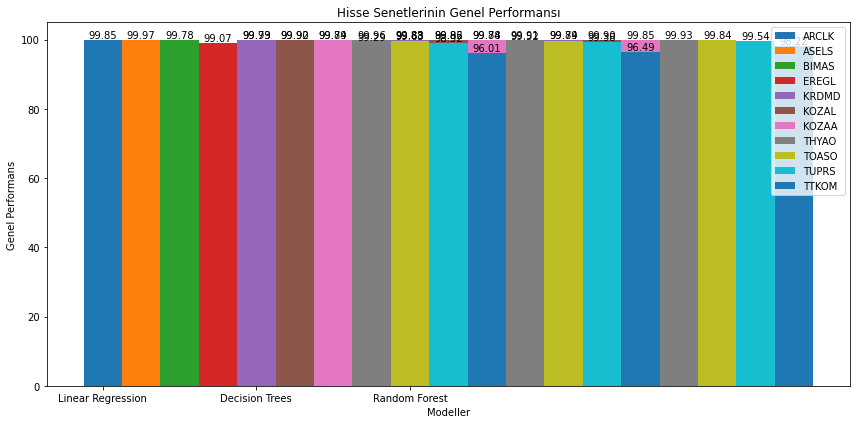

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setini yükleyin

# Hisse isimlerini belirleyin
hisse_isimleri = ['ARCLK', 'ASELS', 'BIMAS', 'EREGL', 'KRDMD', 'KOZAL', 'KOZAA', 'THYAO', 'TOASO', 'TUPRS', 'TTKOM']

# Performans tablosunu oluşturmak için boş bir DataFrame oluşturun
performans_tablosu = pd.DataFrame(columns=['Hisse', 'Model', 'Genel Performans'])

# Her bir hisse için ayrı bir model oluşturun
for hisse in hisse_isimleri:
    # Hisse veri çerçevesini oluşturun
    hisse_df = data[data['hisse adı'] == hisse]

    # Bağımsız değişkenleri (özellikleri) ve hedef değişkeni belirleyin
    features = ["Year", "High", "Low", "Open", "Volume","Cari Oran","Asit-Test Oranı","Nakit Oran","Özsermaye Devir Hızı","Özsermaye Karlılığı","Net Kar Marjı"]
    target = 'Adj Close'

    X = hisse_df[features]
    y = hisse_df[target]

    # Veri setini eğitim ve test olarak ayırın
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Model performanslarını depolamak için bir liste oluşturun
    model_performanslari = []

    # Linear Regression modelini oluşturun
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    genel_performans = 100 * (1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test))
    model_performanslari.append(('Linear Regression', genel_performans))

    # Decision Trees modelini oluşturun
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    genel_performans = 100 * (1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test))
    model_performanslari.append(('Decision Trees', genel_performans))

    # Random Forest modelini oluşturun
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    genel_performans = 100 * (1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test))
    model_performanslari.append(('Random Forest', genel_performans))

    # Performans tablosuna ekleme yapın
    for model, performans in model_performanslari:
        performans_tablosu = performans_tablosu.append({'Hisse': hisse, 'Model': model, 'Genel Performans': performans}, ignore_index=True)

# Performans tablosunu yazdırın
print(performans_tablosu)

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(12, 6))

# Her bir hisse için çubuk grafikleri oluşturun
for i, hisse in enumerate(hisse_isimleri):
    hisse_tablosu = performans_tablosu[performans_tablosu['Hisse'] == hisse]
    x = np.arange(len(hisse_tablosu))
    ax.bar(x + i * 0.25, hisse_tablosu['Genel Performans'], width=0.25, label=hisse)

# Eksen ve başlık ayarları
ax.set_xlabel('Modeller')
ax.set_ylabel('Genel Performans')
ax.set_title('Hisse Senetlerinin Genel Performansı')
ax.set_xticks(np.arange(len(hisse_tablosu)))
ax.set_xticklabels(hisse_tablosu['Model'])
ax.legend()

# Yüzde değerlerini etiket olarak ekleme
for i, hisse in enumerate(hisse_isimleri):
    hisse_tablosu = performans_tablosu[performans_tablosu['Hisse'] == hisse]
    for j, v in enumerate(hisse_tablosu['Genel Performans']):
        ax.text(j + i * 0.25, v, f'{v:.2f}', ha='center', va='bottom')

# Grafikleri gösterme
plt.tight_layout()
plt.show()
